In [1]:
# from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
from env import host, user, password

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [3]:
url = get_db_url("grocery_db")

sql = """
select *
from grocery_customers
"""

df = pd.read_sql(sql, url, index_col="customer_id")

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.shape

(440, 8)

In [6]:
df.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [7]:
df.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

Channel


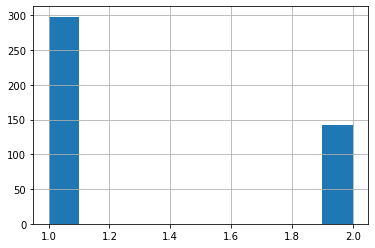

Region


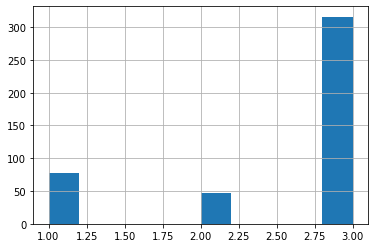

Fresh


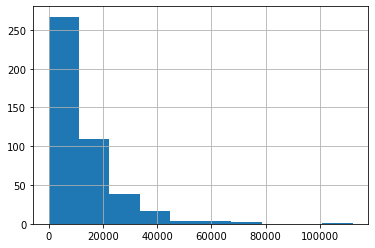

Milk


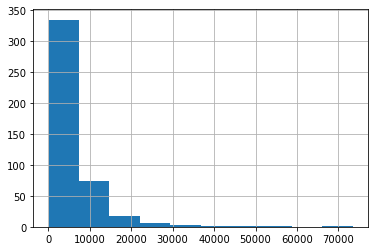

Grocery


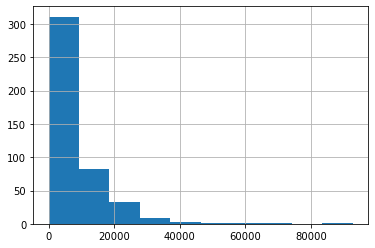

Frozen


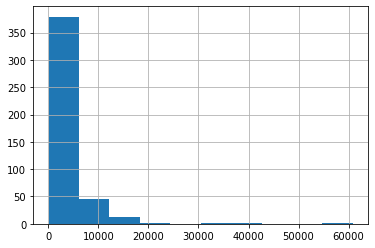

Detergents_Paper


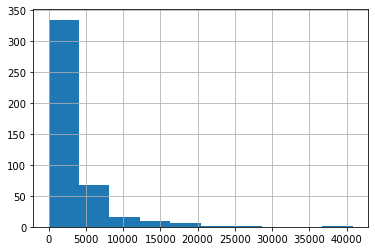

Delicassen


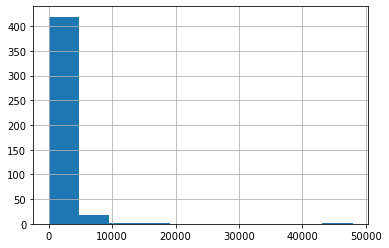

In [8]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        print(col)
        plt.show()

<AxesSubplot:>

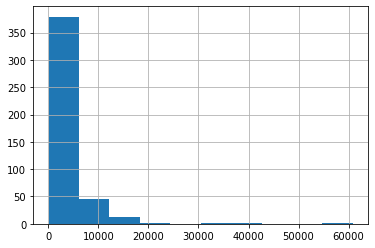

In [9]:
df.Frozen.hist()

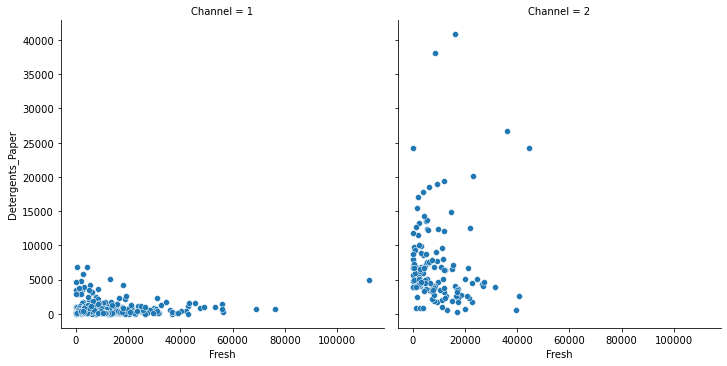

In [10]:
sns.relplot(x='Fresh', y='Detergents_Paper', col='Channel', data=df)

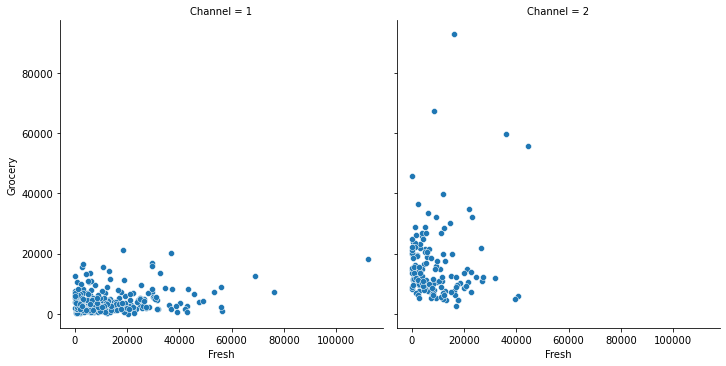

In [11]:
sns.relplot(x='Fresh', y='Grocery', col='Channel', data=df)

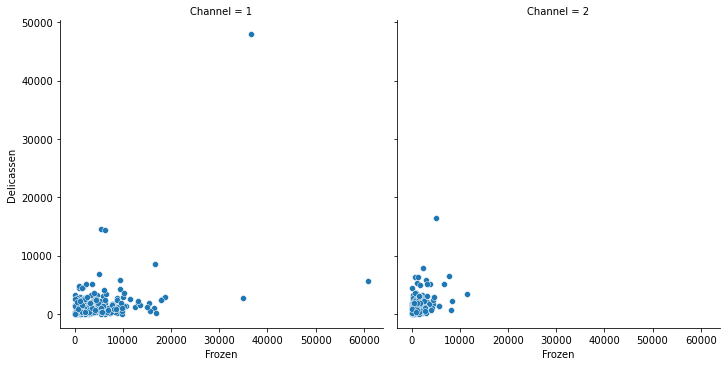

In [12]:
sns.relplot(x='Frozen', y='Delicassen', col='Channel', data=df)

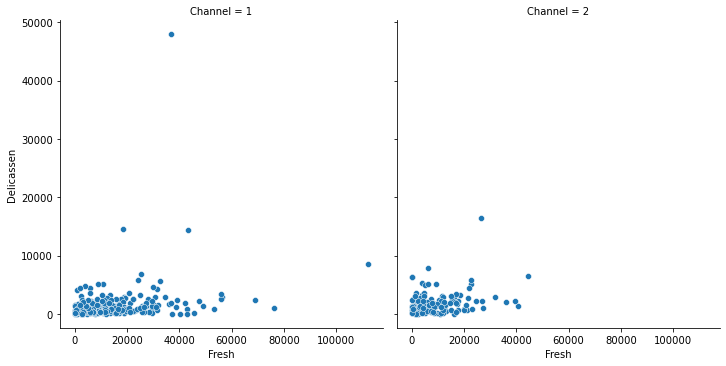

In [13]:
sns.relplot(x='Fresh', y='Delicassen', col='Channel', data=df)

In [14]:
# df.drop(["Channel", "Region"], axis = 1, inplace = True)
df = df[["Frozen", "Detergents_Paper", "Fresh"]]

In [15]:
def scale_data(df):
    
    np_array = df.values.astype("float32", copy = False)
    np_array[0:10]

    # make the thing
    scaler = MinMaxScaler().fit(np_array)

    # fit the thing
    np_array = scaler.transform(np_array)

    # use the thing
    np_array[0:10]

    # fit the scaler with params
    dbsc = DBSCAN(eps = .10, min_samples = 20).fit(np_array)
        
    # make the thing
    scaler = MinMaxScaler().fit(np_array)

    # fit the thing
    np_array = scaler.transform(np_array)

    # use the thing
    np_array[0:10]

    # Now, let's add the scaled value columns back onto the dataframe
    columns = list(df.columns)
    scaled_columns = ["Scaled_" + column for column in columns]

    # Save a copy of the original dataframe
    original_df = df.copy()

    # Create a dataframe containing the scaled values
    scaled_df = pd.DataFrame(np_array, columns=scaled_columns)

    # Merge the scaled and non-scaled values into one dataframe
    df = df.merge(scaled_df, on=df.index)
    df = df.drop(columns=['key_0'])

    labels = dbsc.labels_

    df['labels'] = labels
    
    return df

In [16]:
df = scale_data(df)

In [17]:
# 23 outliers, Only one cluster of 417

In [18]:
df[df.labels==-1].head()

,Frozen,Detergents_Paper,Fresh,Scaled_Frozen,Scaled_Detergents_Paper,Scaled_Fresh,labels
39,10002,212,56159,0.163977,0.005120,0.500731,-1
47,7782,24171,44466,0.127490,0.592005,0.396467,-1
56,2616,17740,4098,0.042584,0.434475,0.036514,-1
61,3254,26701,35942,0.053070,0.653978,0.320460,-1
65,36,24231,85,0.000181,0.593474,0.000731,-1


In [19]:
# Let's look at the descriptive stats for the entire population, the inliers, then the outliers/anomalies
print("Population")
print(df.describe())
print("-------------")
print("Inliers")
print(df[df.labels==0].describe())
print("-------------")
print("Outliers")
print(df[df.labels==-1].describe())

Population
             Frozen  Detergents_Paper          Fresh  Scaled_Frozen  \
count    440.000000        440.000000     440.000000     440.000000   
mean    3071.931818       2881.493182   12000.297727       0.050078   
std     4854.673333       4767.854448   12647.328865       0.079789   
min       25.000000          3.000000       3.000000       0.000000   
25%      742.250000        256.750000    3127.750000       0.011788   
50%     1526.000000        816.500000    8504.000000       0.024670   
75%     3554.250000       3922.000000   16933.750000       0.058005   
max    60869.000000      40827.000000  112151.000000       1.000000   

       Scaled_Detergents_Paper  Scaled_Fresh      labels  
count               440.000000    440.000000  440.000000  
mean                  0.070510      0.106977   -0.052273  
std                   0.116790      0.112774    0.222830  
min                   0.000000      0.000000   -1.000000  
25%                   0.006216      0.027863    0.0000

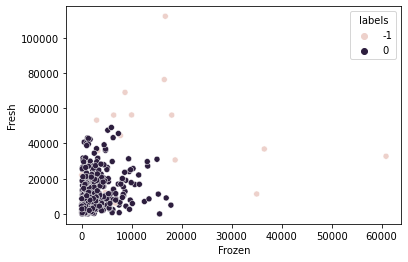

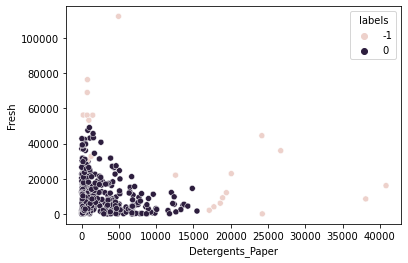

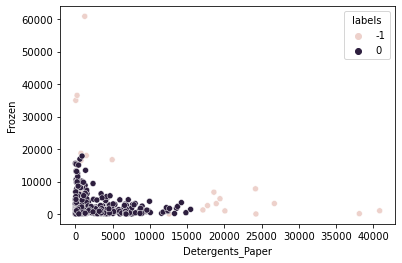

In [20]:
sns.scatterplot(df.Frozen, df.Fresh, hue=df.labels)
plt.show()

sns.scatterplot(df.Detergents_Paper, df.Fresh, hue=df.labels)
plt.show()

sns.scatterplot(df.Detergents_Paper, df.Frozen, hue=df.labels)
plt.show()

In [24]:
url = get_db_url("grocery_db")

sql = """
select *
from grocery_customers
"""

df = pd.read_sql(sql, url, index_col="customer_id")

In [25]:
# df.drop(["Channel", "Region"], axis = 1, inplace = True)
df = df[["Frozen", "Detergents_Paper", "Delicassen"]]

In [32]:
def scale_data(df):
    
    np_array = df.values.astype("float32", copy = False)
    np_array[0:10]

    # make the thing
    scaler = MinMaxScaler().fit(np_array)

    # fit the thing
    np_array = scaler.transform(np_array)

    # use the thing
    np_array[0:10]

    # fit the scaler with params
    dbsc = DBSCAN(eps = .10, min_samples = 20).fit(np_array)
        
    # make the thing
    scaler = MinMaxScaler().fit(np_array)

    # fit the thing
    np_array = scaler.transform(np_array)

    # use the thing
    np_array[0:10]

    # Now, let's add the scaled value columns back onto the dataframe
    columns = list(df.columns)
    scaled_columns = ["Scaled_" + column for column in columns]

    # Save a copy of the original dataframe
    original_df = df.copy()

    # Create a dataframe containing the scaled values
    scaled_df = pd.DataFrame(np_array, columns=scaled_columns)

    # Merge the scaled and non-scaled values into one dataframe
    df = df.merge(scaled_df, on=df.index)
    df = df.drop(columns=['key_0'])

    labels = dbsc.labels_

    df['labels'] = labels
    
    return df

In [33]:
df = scale_data(df)

In [34]:
df.head()

,Frozen,Detergents_Paper,Delicassen,Scaled_Frozen,Scaled_Detergents_Paper,Scaled_Delicassen,labels
0,214,2674,1338,0.003106,0.065427,0.027847,0
1,1762,3293,1776,0.028548,0.080590,0.036984,0
2,2405,3516,7844,0.039116,0.086052,0.163559,0
3,6404,507,1788,0.104842,0.012346,0.037234,0
4,3915,1777,5185,0.063934,0.043455,0.108093,0


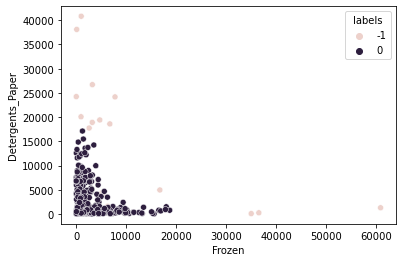

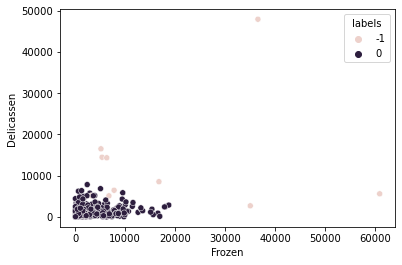

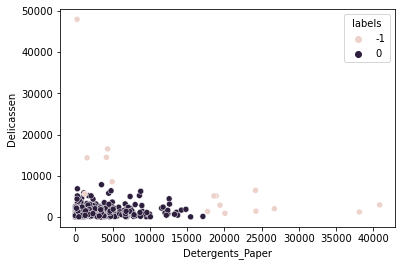

In [35]:
sns.scatterplot(df.Frozen, df.Detergents_Paper, hue=df.labels)
plt.show()

sns.scatterplot(df.Frozen, df.Delicassen, hue=df.labels)
plt.show()

sns.scatterplot(df.Detergents_Paper, df.Delicassen, hue=df.labels)
plt.show()